<a href="https://colab.research.google.com/github/shilpapanniru/ShilpaReddyDS/blob/main/WeatherForecastingProjectBYShilpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/weather_data.csv')
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#convert the Date  type
df['date']=pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [ ]:
data=df[['date','meantemp']]
data

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
1457,2016-12-28,17.217391
1458,2016-12-29,15.238095
1459,2016-12-30,14.095238
1460,2016-12-31,15.052632


In [ ]:
#convert the date column to index
data['date']=pd.to_datetime(data['date'])
data.set_index('date',inplace=True)

/tmp/ipython-input-1069861344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date']=pd.to_datetime(data['date'])


In [ ]:
data

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


<Axes: xlabel='date'>

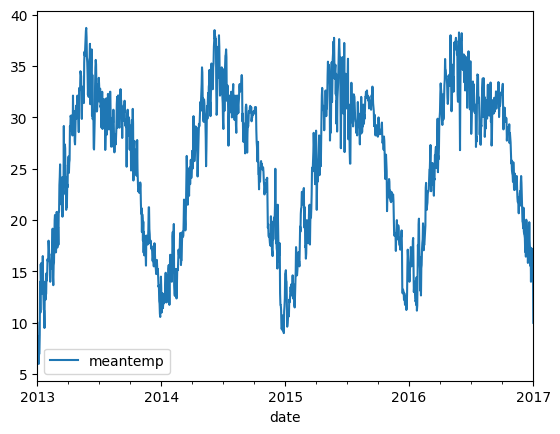

In [ ]:
#check  time components
df.plot(x='date',y='meantemp')

In [ ]:
!pip install statsmodels


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


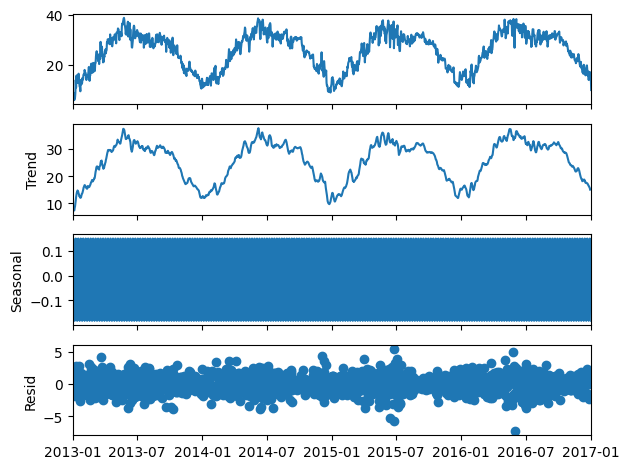

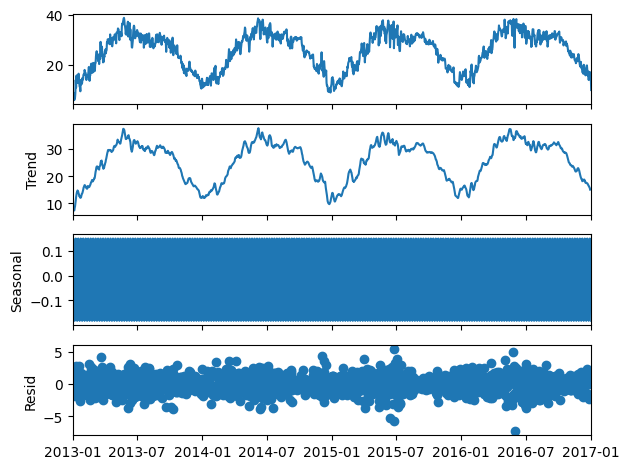

In [ ]:
result_add=seasonal_decompose(data,model='additive')
result_add.plot()

In [ ]:
#check stationarity, non stationarity
from statsmodels.tsa.stattools import adfuller


In [ ]:
adf_result=adfuller(data['meantemp'])


In [ ]:
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values: {adf_result[4]}")

ADF Statistic: -2.021069055920673
p-value: 0.2774121372301602
Critical Values: {'1%': np.float64(-3.4348647527922824), '5%': np.float64(-2.863533960720434), '10%': np.float64(-2.567831568508802)}


In [ ]:
if adf_result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")


The time series is non-stationary.


In [ ]:
data

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


In [ ]:
first_diff=data.diff()
first_diff

,meantemp
date,
2013-01-01,NaN
2013-01-02,-2.600000
2013-01-03,-0.233333
2013-01-04,1.500000
2013-01-05,-2.666667
...,...
2016-12-28,0.367391
2016-12-29,-1.979296
2016-12-30,-1.142857


In [ ]:
test_result=adfuller(first_diff.dropna())
print(f"ADF Statistic: {test_result[0]}")
print(f"p-value: {test_result[1]}")

ADF Statistic: -16.378720267074687
p-value: 2.764863137594565e-29


In [ ]:
if test_result[1] <= 0.05:
    print("The time series is stationary.")
    print(f"p-value: {test_result[1]}")
else:
    print("The time series is non-stationary")

The time series is stationary.
p-value: 2.764863137594565e-29


In [ ]:
#since the series is stationary, implement ARIMA model
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
model=ARIMA(data,order=(5,1,1))
model_fit=model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


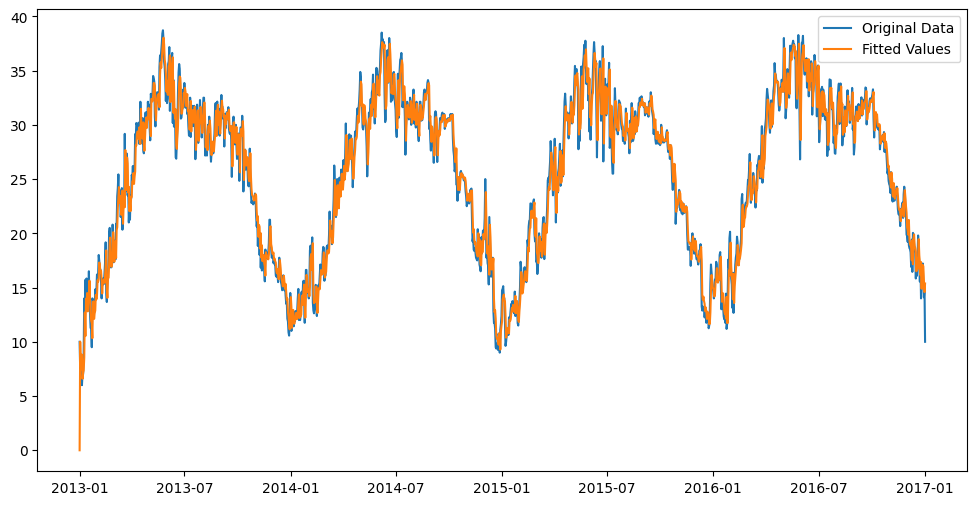

In [ ]:
#check this model visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(data,label='Original Data')
plt.plot(model_fit.fittedvalues,label='Fitted Values')
plt.legend()
plt.show()



In [ ]:
#forecast the future value
forecast_meantemp=model_fit.forecast(steps=30).to_list()
forecast_meantemp

[11.379410700899903,
 12.016291523517303,
 12.799702433122649,
 12.932253539264751,
 13.052011808420264,
 13.064721744237564,
 13.08251228738703,
 13.079891950415348,
 13.080401470447766,
 13.078578556792042,
 13.078294286841533,
 13.077836326219234,
 13.077773367421273,
 13.077692616049926,
 13.077692208749188,
 13.077683595941382,
 13.07768744460212,
 13.077687342734256,
 13.077688725902807,
 13.07768887795398,
 13.077689186497045,
 13.077689205157654,
 13.077689252874887,
 13.077689246641976,
 13.077689251148367,
 13.077689247540965,
 13.077689247562477,
 13.07768924654285,
 13.07768924648944,
 13.077689246288807]

In [ ]:
data1=df[['date','humidity']]
data1

,date,humidity
0,2013-01-01,84.500000
1,2013-01-02,92.000000
2,2013-01-03,87.000000
3,2013-01-04,71.333333
4,2013-01-05,86.833333
...,...,...
1457,2016-12-28,68.043478
1458,2016-12-29,87.857143
1459,2016-12-30,89.666667
1460,2016-12-31,87.000000


In [ ]:
#convert the dtat index
data1['date']=pd.to_datetime(data1['date'])
data1.set_index('date',inplace=True)

/tmp/ipython-input-3893450154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['date']=pd.to_datetime(data1['date'])


In [ ]:
data1

,humidity
date,
2013-01-01,84.500000
2013-01-02,92.000000
2013-01-03,87.000000
2013-01-04,71.333333
2013-01-05,86.833333
...,...
2016-12-28,68.043478
2016-12-29,87.857143
2016-12-30,89.666667


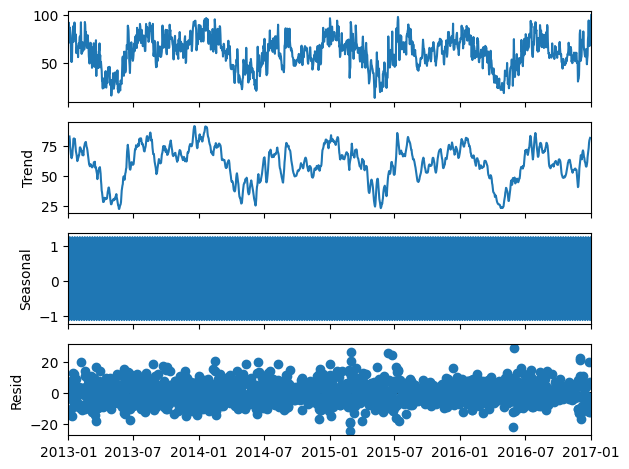

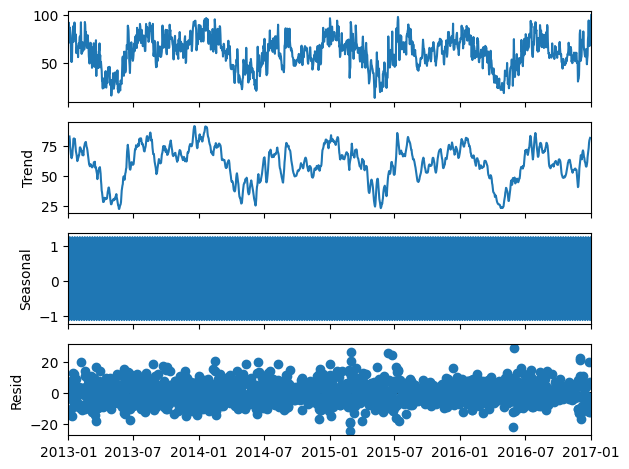

In [ ]:
#check the additive components
result_add=seasonal_decompose(data1,model='additive')
result_add.plot()

In [ ]:
#check the stationarity
adf_result1=adfuller(data1['humidity'])
print(f"ADF Statistic: {adf_result1[0]}")
print(f"p-value: {adf_result1[1]}")

ADF Statistic: -3.675576919163344
p-value: 0.004470100478130688


In [ ]:
if adf_result1[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")

The time series is stationary.


In [ ]:
data1.shape

(1462, 1)

In [ ]:
#split the data in to train , test
train_data=data1[:int(0.8*(len(data1)))]
train_data.shape


(1169, 1)

In [ ]:
test_data=data1[int(0.8*(len(data1))):]
test_data.shape


(293, 1)

In [ ]:
#since the series is stationary, implement ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model1=ARIMA(train_data,order=(5,0,1))
model_fit1=model1.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


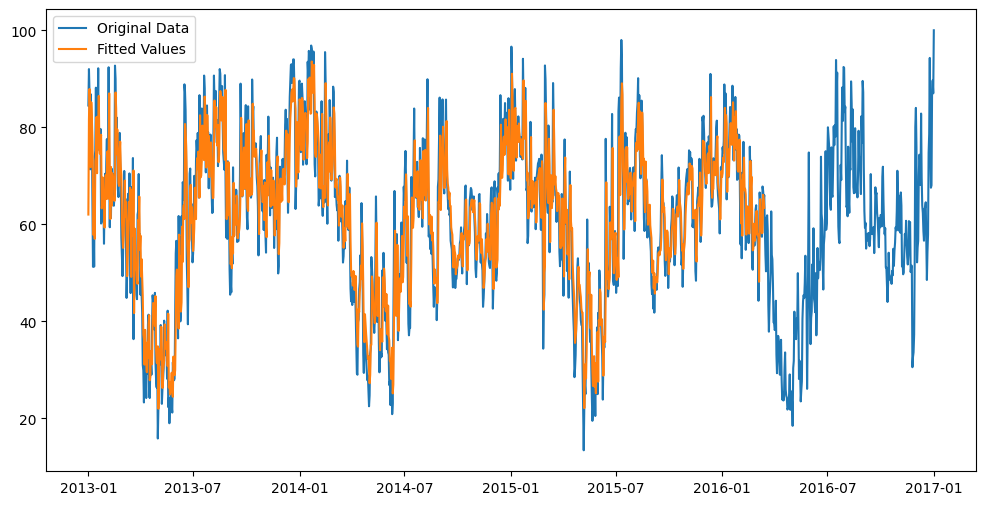

In [ ]:
#check the fit of model1
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(data1,label='Original Data')
plt.plot(model_fit1.fittedvalues,label='Fitted Values')
plt.legend()
plt.show()

In [ ]:
#forecast the future value
forecast_humidity=model_fit1.forecast(steps=30).to_list()
forecast_humidity

[92.94065158687681,
 87.78832812866234,
 83.81579301937688,
 82.28175384665093,
 81.5400085499827,
 81.12515731508907,
 80.73549015938767,
 80.35654102455376,
 79.98471387510776,
 79.62683470864101,
 79.28021321389602,
 78.9425623965871,
 78.61198333822672,
 78.28773569814567,
 77.96950020396824,
 77.65713866806104,
 77.35053317514972,
 77.0495709351512,
 76.7541409252827,
 76.46413729313302,
 76.17945838687497,
 75.900005753873,
 75.62568322822719,
 75.35639656033264,
 75.09205326604952,
 74.83256257507897,
 74.57783539392408,
 74.32778427187279,
 74.08232336734895,
 73.84136841623905]

In [ ]:
Data2=df[['date','wind_speed']]
Data2

,date,wind_speed
0,2013-01-01,0.000000
1,2013-01-02,2.980000
2,2013-01-03,4.633333
3,2013-01-04,1.233333
4,2013-01-05,3.700000
...,...,...
1457,2016-12-28,3.547826
1458,2016-12-29,6.000000
1459,2016-12-30,6.266667
1460,2016-12-31,7.325000


In [ ]:
#convert datae index
Data2['date']=pd.to_datetime(Data2['date'])
Data2.set_index('date',inplace=True)

/tmp/ipython-input-3520469902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2['date']=pd.to_datetime(Data2['date'])


In [ ]:
Data2

,date,wind_speed
0,2013-01-01,0.000000
1,2013-01-02,2.980000
2,2013-01-03,4.633333
3,2013-01-04,1.233333
4,2013-01-05,3.700000
...,...,...
1457,2016-12-28,3.547826
1458,2016-12-29,6.000000
1459,2016-12-30,6.266667
1460,2016-12-31,7.325000


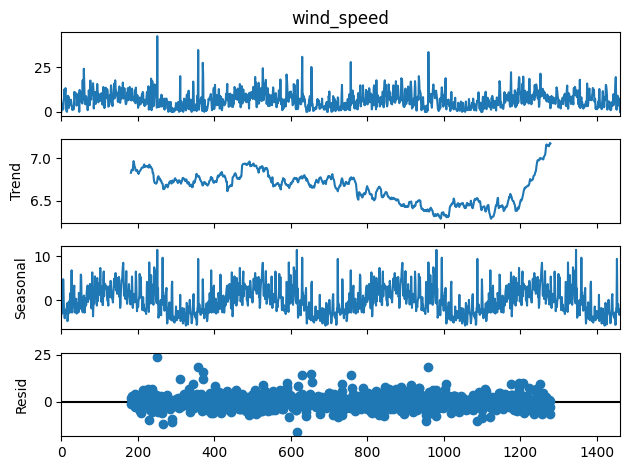

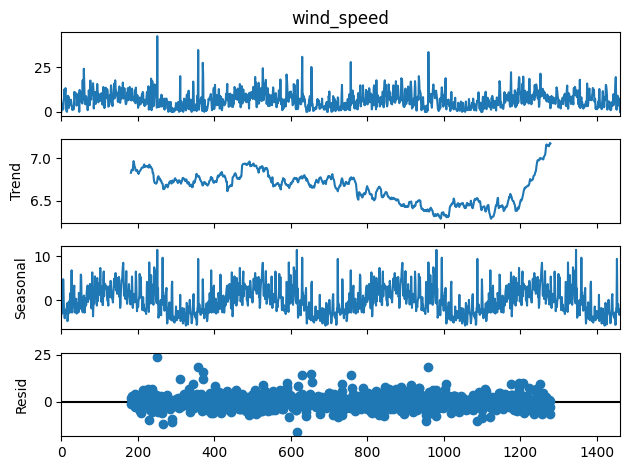

In [ ]:
#check components
result_add=seasonal_decompose(Data2['wind_speed'],model='additive', period=365)
result_add.plot()

In [ ]:
#check stationarity
adf_result2=adfuller(Data2['wind_speed'])
print(f"ADF Statistic: {adf_result2[0]}")
print(f"p-value: {adf_result2[1]}")

ADF Statistic: -3.838096756685102
p-value: 0.0025407221531464283


In [ ]:
#since data is stationary implement ARIMA
model2=ARIMA(train_data,order=(5,0,1))
model_fit2=model2.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


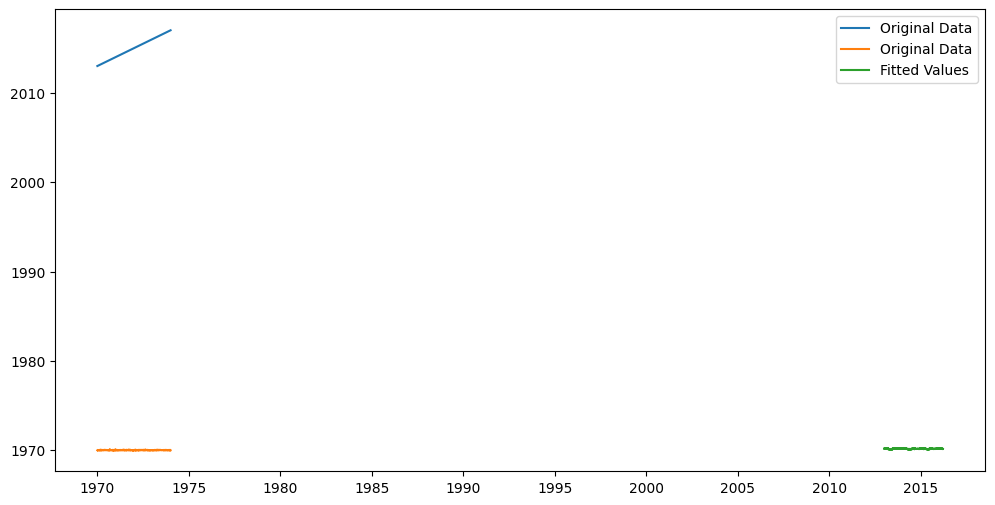

In [ ]:
#check model visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(Data2,label='Original Data')
plt.plot(model_fit2.fittedvalues,label='Fitted Values')
plt.legend()
plt.show()

In [ ]:
#Forecast the future value
forecast_wind_speed=model_fit2.forecast(steps=30).to_list()
forecast_wind_speed

[4.147640137646985,
 5.841562325941044,
 6.238398051723027,
 6.340780736438398,
 6.360127563970085,
 6.363903332346546,
 6.36744934472107,
 6.371853119444216,
 6.3766413554502135,
 6.381511391166981,
 6.386348958626246,
 6.3911236821603525,
 6.3958304085188615,
 6.400469537696741,
 6.405042225759804,
 6.409549557094147,
 6.413992515190964,
 6.41837203292103,
 6.422689018838704,
 6.426944366048709,
 6.4311389545581195,
 6.435273651832858,
 6.4393493129907915,
 6.443366780956527,
 6.447326886624131,
 6.451230449025092,
 6.45507827549674,
 6.45887116184906,
 6.46260989252926,
 6.466295240784037]

In [ ]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 9.4 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima


In [ ]:
autoarima_model=auto_arima(Data2['wind_speed'])

In [ ]:
autoarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1462
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -4110.406
Date:                Sat, 13 Dec 2025   AIC                           8230.813
Time:                        17:49:05   BIC                           8257.250
Sample:                             0   HQIC                          8240.674
                               - 1462                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0705      0.038      1.846      0.065      -0.004       0.145
ar.L1          1.3147      0.023     56.889      0.000       1.269       1.360
ar.L2         -0.3252      0.020    -16.174      0.000      -0.365      -0.286
ma.L1         -0.9479      0.015    -62.267      0.000      -0.978      -0.918
sigma2        16.2355      0.311     52.142      0.000      15.625      16.846
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):              7212.62
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             1.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model3=SARIMAX(Data2['wind_speed'],order=(2,0,1),seasonal_order=(2,0,1,12))
model_fit3=model3.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
data2_pred=model_fit3.predict(start=len(Data2),end=len(Data2)+29)

In [ ]:
data2_pred

,predicted_mean
2017-01-02,4.494100
2017-01-03,5.465808
2017-01-04,5.745650
2017-01-05,5.894815
2017-01-06,6.087477
2017-01-07,6.002947
2017-01-08,6.037743
2017-01-09,5.911944
2017-01-10,6.032810
2017-01-11,5.929584
